In [11]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from util import *


In [75]:
im = imageio.imread('../messungen/Boettcher_Matthes/Kaustik-Messung/15_2008-07-13_03h-04m-14s_original.png')[250:350,350:450].astype(float)
im

Array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
row = np.argmax(np.max(im, axis=1)) + 1


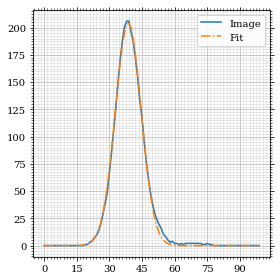

In [108]:
r = im[row,:]
ind = np.arange(0, r.size)
fig, ax = set_up_plot()
def gauss(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

opt, cov = curve_fit(gauss, ind, r,
                         p0=(1, r.argmax(), 100))
cov = np.sqrt(np.diag(cov))
ax.plot(im[row,:], label='Image')
ax.plot(ind, gauss(ind, *opt), label='Fit', linestyle='-.')
ax.legend()
save_fig(fig, 'peakfit', 'kaustik', size=(4,4))


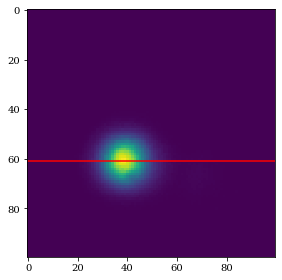

In [111]:
%matplotlib inline
plt.imshow(im)
plt.axhline(row, color='red')
save_fig(plt.gcf(), 'kaust_red', 'kaustik')

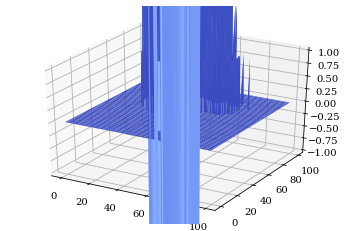

In [93]:

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, im.shape[0])
Y = np.arange(0, im.shape[1])
X, Y = np.meshgrid(X, Y)
Z = im

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=10)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)


plt.show()


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f0f2dfa3700>)

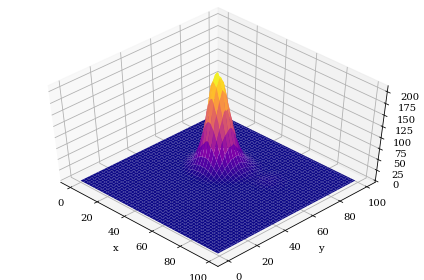

In [80]:
plot_reconstruction(im)


[array([0.21496948, 0.00604639, 0.00604639, 0.00427544])]

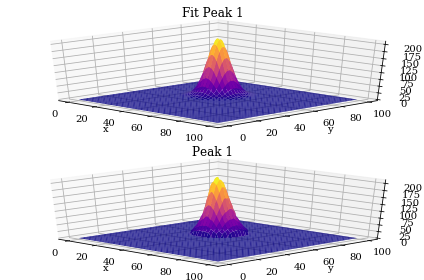

In [85]:
find_peak_positions(im)